# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, make_scorer, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df_raw = pd.read_csv("./Dataset_clustering.csv")

In [3]:
df_raw.head(3)

,Gender,Department,Attendance (%),Total_Score,Grade,Study_Hours_per_Week,Internet_Access_at_Home,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Cluster
0,Female,Engineering,52.29,56.09,F,6.2,Yes,Medium,5,4.7,1
1,Male,Engineering,97.27,50.64,A,19.0,Yes,Medium,4,9.0,0
2,Male,Business,57.19,70.30,D,20.7,Yes,Low,6,6.2,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
df_x = df_raw.copy()
df_y = df_x.pop("Cluster")

In [5]:
print(df_x.columns)
print(df_y)

Index(['Gender', 'Department', 'Attendance (%)', 'Total_Score', 'Grade',
       'Study_Hours_per_Week', 'Internet_Access_at_Home',
       'Family_Income_Level', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night'],
      dtype='object')
0       1
1       0
2       0
3       1
4       1
       ..
4995    0
4996    0
4997    3
4998    0
4999    1
Name: Cluster, Length: 5000, dtype: int64


In [6]:
df_x_preprocessed = df_x.copy()

In [7]:
df_x_preprocessed['Attendance (%)'] = df_x_preprocessed['Attendance (%)'].fillna(df_x_preprocessed['Attendance (%)'].mean())
df_x_preprocessed.isna().sum()

Gender                     0
Department                 0
Attendance (%)             0
Total_Score                0
Grade                      0
Study_Hours_per_Week       0
Internet_Access_at_Home    0
Family_Income_Level        0
Stress_Level (1-10)        0
Sleep_Hours_per_Night      0
dtype: int64

In [8]:
encoder = OneHotEncoder(drop=None, sparse_output=False, dtype=int)

encoded_array = encoder.fit_transform(df_x_preprocessed[['Gender', 'Department', 'Internet_Access_at_Home']])

df_encoded = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Gender', 'Department', 'Internet_Access_at_Home']), index=df_x_preprocessed.index)

df_x_preprocessed = df_x_preprocessed.drop(columns=['Gender', 'Department', 'Internet_Access_at_Home'])
df_x_preprocessed = pd.concat([df_x_preprocessed, df_encoded], axis=1)

df_x_preprocessed.head(3)

,Attendance (%),Total_Score,Grade,Study_Hours_per_Week,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Gender_Female,Gender_Male,Department_Business,Department_CS,Department_Engineering,Department_Mathematics,Internet_Access_at_Home_No,Internet_Access_at_Home_Yes
0,52.29,56.09,F,6.2,Medium,5,4.7,1,0,0,0,1,0,0,1
1,97.27,50.64,A,19.0,Medium,4,9.0,0,1,0,0,1,0,0,1
2,57.19,70.30,D,20.7,Low,6,6.2,0,1,1,0,0,0,0,1


In [9]:
df_x_preprocessed.columns

Index(['Attendance (%)', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Family_Income_Level', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night',
       'Gender_Female', 'Gender_Male', 'Department_Business', 'Department_CS',
       'Department_Engineering', 'Department_Mathematics',
       'Internet_Access_at_Home_No', 'Internet_Access_at_Home_Yes'],
      dtype='object')

In [10]:
grade_order = ['F', 'E', 'D', 'C', 'B', 'A']
income_order = ['Low', 'Medium', 'High']

In [11]:
df_x_preprocessed['Grade'] = pd.Categorical(df_x_preprocessed['Grade'], categories=grade_order, ordered=True).codes
df_x_preprocessed['Family_Income_Level'] = pd.Categorical(df_x_preprocessed['Family_Income_Level'], categories=income_order, ordered=True).codes

df_x_preprocessed.head(3)

,Attendance (%),Total_Score,Grade,Study_Hours_per_Week,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Gender_Female,Gender_Male,Department_Business,Department_CS,Department_Engineering,Department_Mathematics,Internet_Access_at_Home_No,Internet_Access_at_Home_Yes
0,52.29,56.09,0,6.2,1,5,4.7,1,0,0,0,1,0,0,1
1,97.27,50.64,5,19.0,1,4,9.0,0,1,0,0,1,0,0,1
2,57.19,70.30,2,20.7,0,6,6.2,0,1,1,0,0,0,0,1


In [12]:
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_x_preprocessed)
df_x_preprocessed = pd.DataFrame(df_normalized, index = df_x_preprocessed.index, columns = df_x_preprocessed.columns)

df_x_preprocessed.describe()

,Attendance (%),Total_Score,Grade,Study_Hours_per_Week,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Gender_Female,Gender_Male,Department_Business,Department_CS,Department_Engineering,Department_Mathematics,Internet_Access_at_Home_No,Internet_Access_at_Home_Yes
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,1.094236e-16,1.811884e-16,6.536993e-17,3.986145e-16,-1.492140e-17,-1.247003e-16,-3.254286e-16,1.989520e-17,-1.989520e-17,9.947598e-18,7.460699e-17,-4.121148e-17,-2.131628e-17,1.207923e-17,-3.126388e-17
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.867969e+00,-1.743362e+00,-1.772715e+00,-1.740017e+00,-1.075661e+00,-1.566021e+00,-1.713432e+00,-9.798039e-01,-1.020612e+00,-5.018743e-01,-8.240019e-01,-6.450035e-01,-3.344433e-01,-3.388616e-01,-2.951057e+00
25%,-7.857899e-01,-8.533391e-01,-6.324853e-01,-8.603082e-01,-1.075661e+00,-8.670294e-01,-8.870643e-01,-9.798039e-01,-1.020612e+00,-5.018743e-01,-8.240019e-01,-6.450035e-01,-3.344433e-01,-3.388616e-01,3.388616e-01
50%,0.000000e+00,1.897392e-02,-6.237055e-02,-2.183602e-02,2.487186e-01,-1.680376e-01,8.167267e-03,-9.798039e-01,9.798039e-01,-5.018743e-01,-8.240019e-01,-6.450035e-01,-3.344433e-01,-3.388616e-01,3.388616e-01
75%,7.899916e-01,8.702778e-01,1.077859e+00,8.853634e-01,2.487186e-01,8.804501e-01,8.345349e-01,1.020612e+00,9.798039e-01,-5.018743e-01,1.213589e+00,1.550379e+00,-3.344433e-01,-3.388616e-01,3.388616e-01
max,1.805303e+00,1.727138e+00,1.077859e+00,1.696345e+00,1.573099e+00,1.579442e+00,1.729766e+00,1.020612e+00,9.798039e-01,1.992531e+00,1.213589e+00,1.550379e+00,2.990043e+00,2.951057e+00,3.388616e-01


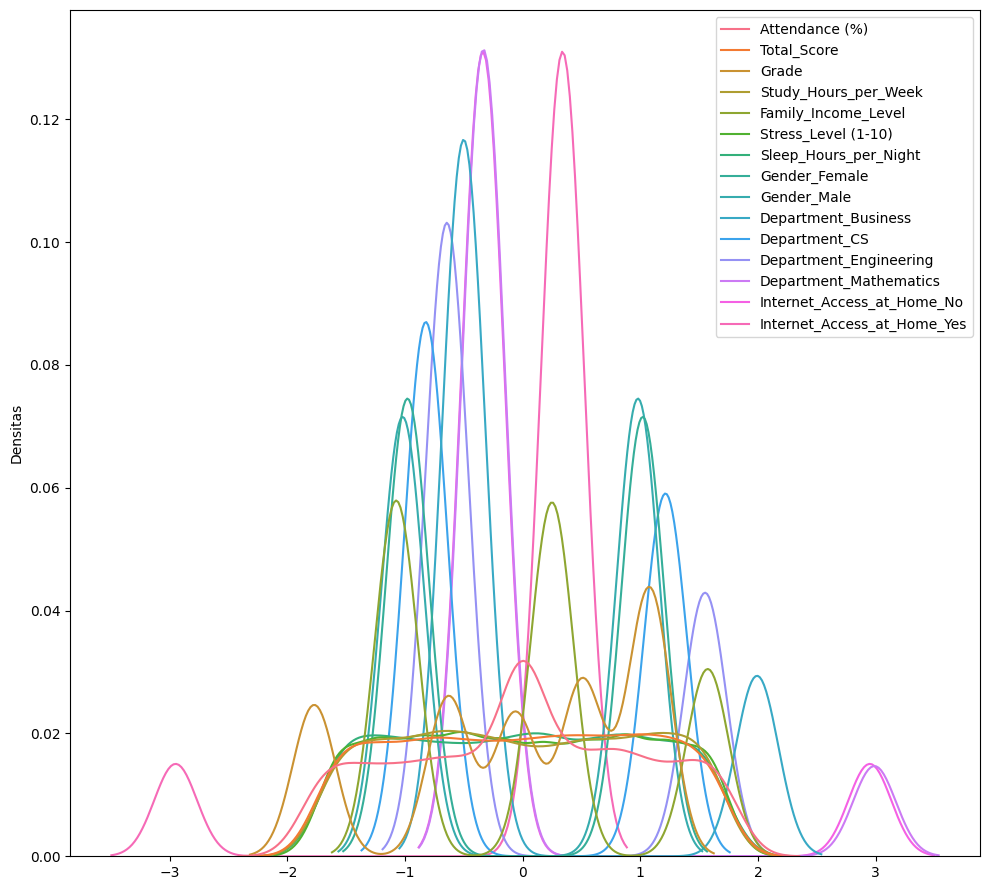

In [13]:
fig, ax = plt.subplots(1,figsize=(10,9))
sns.kdeplot(ax=ax, data=df_x_preprocessed)

ax.set_ylabel('Densitas')

fig.tight_layout()
plt.show()

In [14]:
RANDOM_STATE = 0

In [15]:
x_train,x_test,y_train,y_test = train_test_split(df_x_preprocessed,df_y,test_size=0.2,random_state=RANDOM_STATE)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 15)
(1000, 15)
(4000,)
(1000,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [17]:
clf_rfc = RandomForestClassifier(random_state=RANDOM_STATE ,n_jobs=-1)
clf_rfc = clf_rfc.fit(x_train,y_train)

**Random Forest** adalah ensemble method berbasis decision tree, di mana banyak decision tree dilatih secara paralel menggunakan subset acak dari data dan fitur. Setiap pohon memberikan prediksi dan hasil akhir diambil melalui mayoritas. Random Forest terkenal karena kemampuannya mengurangi overfitting, menangani data berukuran besar, serta memberikan estimasi akurasi yang baik bahkan tanpa perlu banyak tuning parameter.

In [18]:
clf_ada = AdaBoostClassifier(random_state=RANDOM_STATE)
clf_ada = clf_ada.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


**AdaBoost (Adaptive Boosting)** adalah algoritma boosting di mana model sederhana (biasanya decision tree kecil atau "decision stumps") dilatih secara berurutan. Setiap model berikutnya fokus memperbaiki kesalahan yang dibuat oleh model sebelumnya, dengan cara memberi bobot lebih besar pada sampel yang salah klasifikasi. Prediksi akhir merupakan kombinasi berbobot dari seluruh model. AdaBoost efektif dalam meningkatkan akurasi model sederhana, terutama pada dataset yang memiliki noise minimal.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [19]:
def cmxReport(ax,predict,actual,title):
  cf_matrix = confusion_matrix(predict,actual)

  group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(4,4)
  
  ax = sns.heatmap(cf_matrix,annot=labels,fmt='',annot_kws={'fontsize':14,'weight':'semibold'},cmap='mako')

  ax.set_title(title,pad=10,fontsize=16,fontweight='semibold')
  ax.set_xlabel('Predicted Values',fontsize=14)
  ax.set_ylabel('Actual Values',fontsize=14)

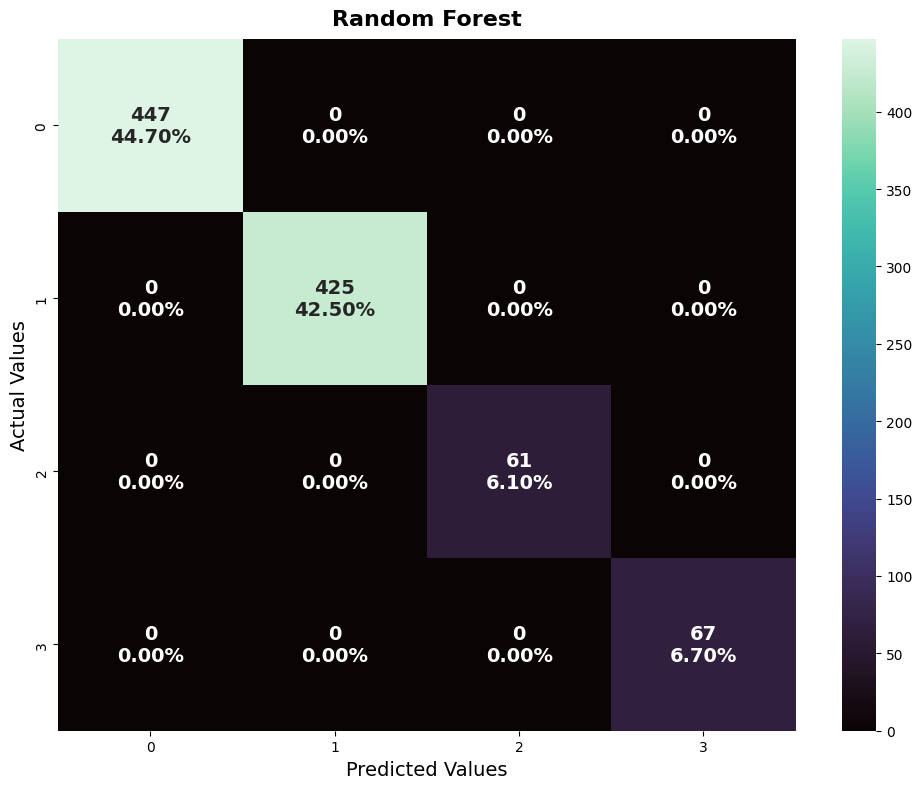

In [20]:
fig, ax = plt.subplots(1,figsize=(10,8))
cmxReport(ax,clf_rfc.predict(x_test),y_test,'Random Forest')
fig.tight_layout()
plt.show()

In [21]:
print(classification_report(y_test, clf_rfc.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       425
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        67

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



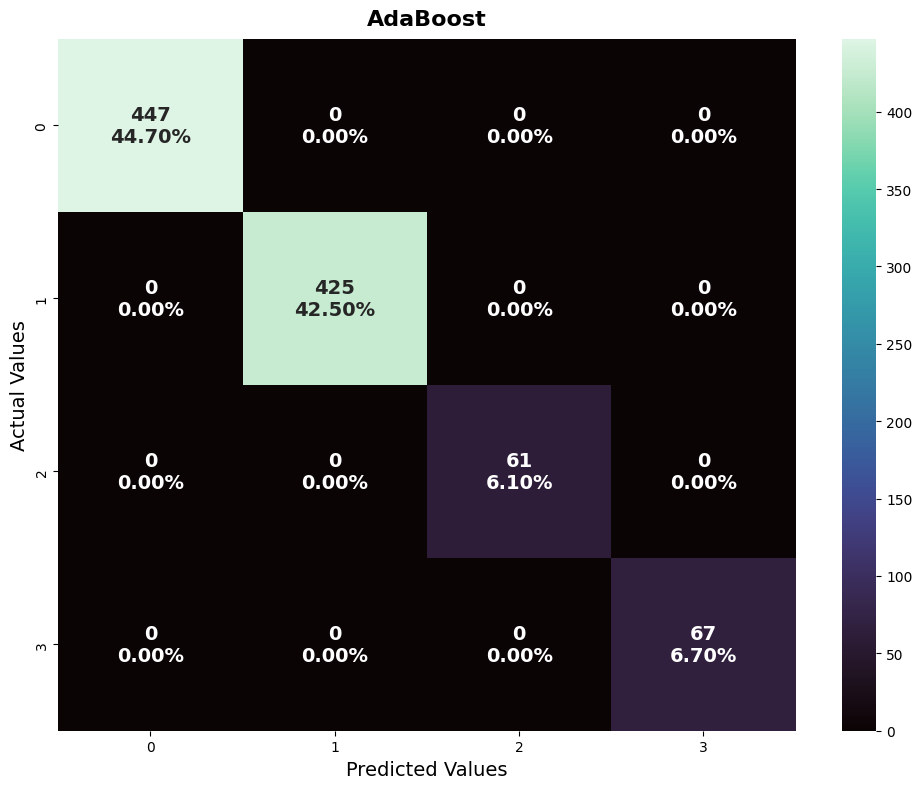

In [22]:
fig, ax = plt.subplots(1,figsize=(10,8))
cmxReport(ax,clf_ada.predict(x_test),y_test,'AdaBoost')
fig.tight_layout()
plt.show()

In [23]:
print(classification_report(y_test, clf_ada.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       425
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        67

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



Terdapat 1000 sample yang terbagi ke dalam 4 kelas (kelas 0, 1, 2, dan 3) diujikan terhadap algoritma Random Forest dan AdaBoost.
* **Random Forest**
    * Precision, Recall, dan F1-Score untuk setiap kelas mencapai 1.00.
    * Akurasi keseluruhan juga mencapai 1.00 atau 100%.
    * Baik nilai macro average maupun weighted average menunjukkan skor sempurna.
* **AdaBoost**
    * Precision, Recall, dan F1-Score untuk setiap kelas juga 1.00.
    * Akurasi total mencapai 100%.
    * Macro average dan weighted average pun sempurna di angka 1.00.

Kedua algoritma menunjukkan performa yang sangat baik dalam menyelesaikan tugas klasifikasi ini, dengan akurasi sempurna di dataset uji. Ini menunjukkan bahwa model mampu mengenali dan mengklasifikasikan setiap kelas dengan sangat presisi tanpa ada kesalahan klasifikasi.

Namun, penting untuk memperhatikan kemungkinan overfitting, terutama jika dataset yang digunakan untuk pelatihan dan pengujian memiliki kemiripan yang sangat tinggi atau kurang beragam. Untuk memastikan generalisasi model, perlu dilakukan pengujian lebih lanjut, seperti validasi silang (cross-validation).

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [24]:
scorer = make_scorer(f1_score, average='macro')

In [25]:
param_grid = {'n_estimators':[50,100,300,1000],'max_depth':[None,70,90,110],'criterion':['gini','entropy'],'max_features':[None,'sqrt','log2']}

In [26]:
gs_rfc = GridSearchCV(
    RandomForestClassifier(random_state=0, n_jobs=-1),
    param_grid,
    cv=StratifiedKFold(n_splits=5),
    return_train_score=True,
    verbose=2,
    scoring=scorer,
    error_score='raise',
    n_jobs=-1
)

gs_rfc.fit(x_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise',
             estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 70, 90, 110],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 300, 1000]},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', average=macro),
             verbose=2)

In [27]:
results_rfc = pd.DataFrame(gs_rfc.cv_results_)
results_rfc = results_rfc[['params','mean_test_score','mean_train_score']].sort_values(['mean_test_score','mean_train_score'],ascending=False,ignore_index=True)

pd.options.display.max_colwidth= 100
pd.options.display.max_rows = 300
results_rfc

,params,mean_test_score,mean_train_score
0,"{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'n_estimators': 50}",1.0,1.0
1,"{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'n_estimators': 100}",1.0,1.0
2,"{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'n_estimators': 300}",1.0,1.0
3,"{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'n_estimators': 1000}",1.0,1.0
4,"{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50}",1.0,1.0
5,"{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}",1.0,1.0
6,"{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 300}",1.0,1.0
7,"{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 1000}",1.0,1.0
8,"{'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 50}",1.0,1.0
9,"{'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}",1.0,1.0


In [28]:
param_grid = {'n_estimators' :np.arange(70,125,5),'learning_rate' :np.arange(0.75,1.30,0.05)}

In [29]:
gs_ada = GridSearchCV(
    AdaBoostClassifier(random_state=0),
    param_grid,
    cv=StratifiedKFold(n_splits=5),
    return_train_score=True,
    verbose=2,
    scoring=scorer,
    n_jobs=-1
)

gs_ada.fit(x_train,y_train)

Fitting 5 folds for each of 121 candidates, totalling 605 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=AdaBoostClassifier(random_state=0), n_jobs=-1,
             param_grid={'learning_rate': array([0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25]),
                         'n_estimators': array([ 70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120])},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', average=macro),
             verbose=2)

In [30]:
results_ada = pd.DataFrame(gs_ada.cv_results_)
results_ada = results_ada[['params','mean_test_score','mean_train_score']].sort_values(['mean_test_score','mean_train_score'],ascending=False,ignore_index=True)

pd.options.display.max_colwidth= 100
pd.options.display.max_rows = 300
results_ada

,params,mean_test_score,mean_train_score
0,"{'learning_rate': 0.75, 'n_estimators': 70}",1.0,1.0
1,"{'learning_rate': 0.75, 'n_estimators': 75}",1.0,1.0
2,"{'learning_rate': 0.75, 'n_estimators': 80}",1.0,1.0
3,"{'learning_rate': 0.75, 'n_estimators': 85}",1.0,1.0
4,"{'learning_rate': 0.75, 'n_estimators': 90}",1.0,1.0
5,"{'learning_rate': 0.75, 'n_estimators': 95}",1.0,1.0
6,"{'learning_rate': 0.75, 'n_estimators': 100}",1.0,1.0
7,"{'learning_rate': 0.75, 'n_estimators': 105}",1.0,1.0
8,"{'learning_rate': 0.75, 'n_estimators': 110}",1.0,1.0
9,"{'learning_rate': 0.75, 'n_estimators': 115}",1.0,1.0


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

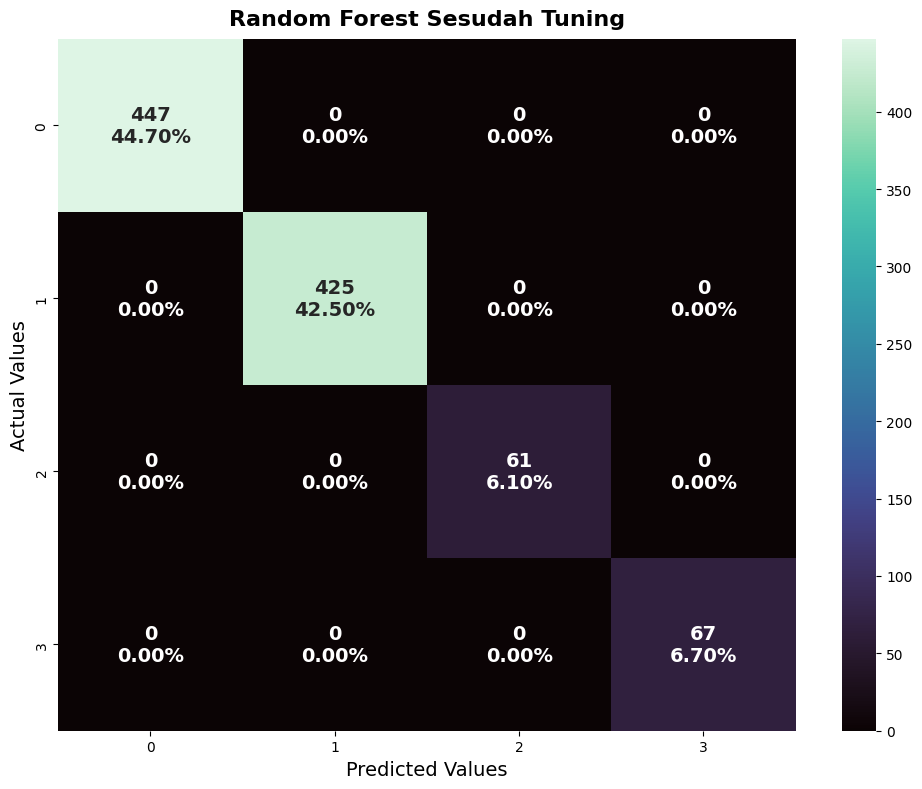

In [33]:
fig, ax = plt.subplots(1,figsize=(10,8))
cmxReport(ax,gs_rfc.predict(x_test),y_test,'Random Forest Sesudah Tuning')
fig.tight_layout()
plt.show()

In [34]:
print(classification_report(y_test, gs_rfc.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       425
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        67

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



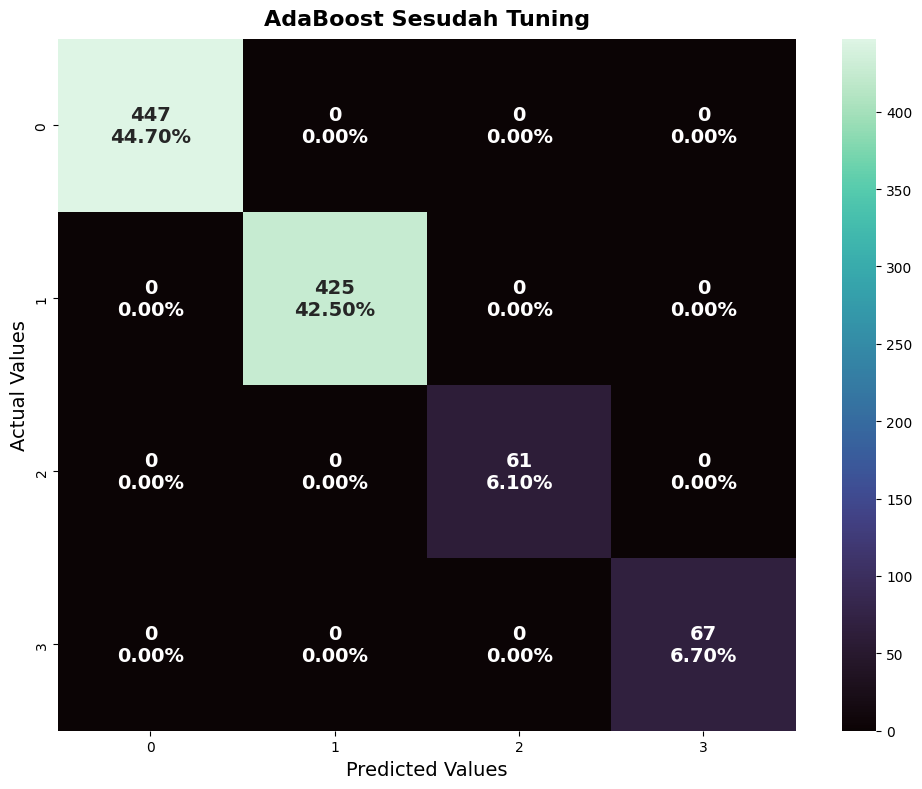

In [35]:
fig, ax = plt.subplots(1,figsize=(10,8))
cmxReport(ax,gs_ada.predict(x_test),y_test,'AdaBoost Sesudah Tuning')
fig.tight_layout()
plt.show()

In [36]:
print(classification_report(y_test, gs_ada.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       425
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        67

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=1000; total time=   2.8s
[CV] END criterion=gini, max_depth=70, max_features=None, n_estimators=1000; total time=   2.7s
[CV] END criterion=gini, max_depth=90, max_features=None, n_estimators=300; total time=   0.9s
[CV] END criterion=gini, max_depth=90, max_features=sqrt, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=90, max_features=sqrt, n_estimators=300; total time=   0.8s
[CV] END criterion=gini, max_depth=90, max_features=log2, n_estimators=50; total time= 

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

* **Random Forest**
    1. Parameter terbaik:
        `{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'n_estimators': 50}`
    2. Hasil pengujian:
        * Precision, Recall, F1-Score untuk semua kelas = 1.00
        * Akurasi keseluruhan = 1.00 (100%)
    3. Analisa:
        * Random Forest mampu mengklasifikasikan seluruh data dengan sempurna sama seperti sebelum dilakukan hyperparameter tuning.
        * Dengan 50 pohon (n_estimators) saja, model sudah mencapai performa maksimal, menunjukkan bahwa dataset ini relatif "mudah" dipelajar.
        * max_depth=None dan max_features=None mengindikasikan bahwa model menggunakan pohon yang dalam dan mempertimbangkan semua fitur saat mencari split terbaik, yang mungkin memperkuat akurasi, tetapi perlu diwaspadai potensi overfitting jika diaplikasikan pada data baru yang berbeda.

* **AdaBoost**
    1. Parameter terbaik:
        `{'learning_rate': 0.75, 'n_estimators': 70}`
    2. Hasil pengujian:
        * Precision, Recall, F1-Score untuk semua kelas = 1.00
        * Akurasi keseluruhan = 1.00 (100%)
    3. Analisa:
        * AdaBoost juga menunjukkan performa sempurna setelah tuning sama seperti sebelum dilakukan hyperparameter tuning.
        * Dengan learning_rate sebesar 0.75, model mempercepat konvergensi ke performa optimal, sementara 70 estimators digunakan untuk mencapai keseimbangan antara bias dan varians.
        * Seperti Random Forest, hasil yang sempurna ini menandakan bahwa dataset sangat terstruktur dengan baik atau relatif sederhana untuk dibedakan.
        
**Kesimpulan**

Setelah maupun sebelum dilakukan hyperparameter tuning menggunakan GridSearchCV dengan StratifiedKFold Cross Validation (5 fold), baik Random Forest maupun AdaBoost mampu mencapai akurasi 100% pada data uji.
Penggunaan StratifiedKFold membantu meningkatkan generalisasi model dengan memastikan distribusi label yang seimbang di setiap fold, sehingga mengurangi risiko overfitting.
Meskipun hasil akurasi sempurna, tetap diperlukan pengujian lebih lanjut pada data baru untuk memastikan performa model di kondisi dunia nyata.
